In [1]:
import os

import dicom
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage import measure, morphology
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


DATA_ROOT = r"/run/media/onionhuang/HDD/artificial_intelligence/kaggle/2017-data-science-bowl"
assert(os.path.exists(DATA_ROOT))

STAGE1_DATA = os.path.join(DATA_ROOT, "stage1")
assert(os.path.exists(STAGE1_DATA))

STAGE1_LABELS = os.path.join(DATA_ROOT, "stage1_labels.csv")
assert(os.path.exists(STAGE1_LABELS))

In [2]:
patients = os.listdir(STAGE1_DATA)
patients_label = pd.read_csv(STAGE1_LABELS, index_col=0)

patients_label.head()

,cancer
id,
0015ceb851d7251b8f399e39779d1e7d,1
0030a160d58723ff36d73f41b170ec21,0
003f41c78e6acfa92430a057ac0b306e,0
006b96310a37b36cccb2ab48d10b49a3,1
008464bb8521d09a42985dd8add3d0d2,1


In [3]:
for patient in patients[:10]:
    label = patients_label.get_value(patient, "cancer")
    path = os.path.join(STAGE1_DATA, patient)
    
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    print("num images:", len(slices))
    print("label:", label)
    print("info:\n{}".format(slices[0]))

num images: 165
label: 1
info:
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.277935330822486808761584073232556496741
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: 'd8ed783494996f55a587270a212f7d5b'
(0010, 0020) Patient ID                          LO: 'd8ed783494996f55a587270a212f7d5b'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.11764719958640203247731731504307846789887179636198572927524
(0020, 000e) Series Instance UID                 UI: 2.25.80827562504795484793828688963182373500092200995164049998088
(0020, 0011) Series Number                       IS: '4'
(0020, 0012)

num images: 173
label: 0
info:
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.67788848959630413178740684047034940468
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '565cdee745ea4e6afc0f7daae81a7963'
(0010, 0020) Patient ID                          LO: '565cdee745ea4e6afc0f7daae81a7963'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.62204948035022700170411718917900062806302913226608446565499
(0020, 000e) Series Instance UID                 UI: 2.25.17941390312468376411658868107294454743686509361354653956139
(0020, 0011) Series Number                       IS: '2'
(0020, 0012) 

num images: 130
label: 0
info:
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.55.226624812190628725374252507814640343479
(0008, 0060) Modality                            CS: 'CT'
(0008, 103e) Series Description                  LO: 'Axial'
(0010, 0010) Patient's Name                      PN: '1ddb5d17d9db61c8ea0fd58d00df05ef'
(0010, 0020) Patient ID                          LO: '1ddb5d17d9db61c8ea0fd58d00df05ef'
(0010, 0030) Patient's Birth Date                DA: '19000101'
(0018, 0060) KVP                                 DS: ''
(0020, 000d) Study Instance UID                  UI: 2.25.12559356483482193074450385944395089219298656403279091970813
(0020, 000e) Series Instance UID                 UI: 2.25.84916865368824218447347619010131781851454704856183435638734
(0020, 0011) Series Number                       IS: '3'
(0020, 0012)

In [4]:
for patient in patients[:10]:
    label = patients_label.get_value(patient, "cancer")
    path = os.path.join(STAGE1_DATA, patient)
    
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    print("pixel array shape:", slices[0].pixel_array.shape)
    print("depth:", len(slices))

pixel array shape: (512, 512)
depth: 165
pixel array shape: (512, 512)
depth: 180
pixel array shape: (512, 512)
depth: 130
pixel array shape: (512, 512)
depth: 260
pixel array shape: (512, 512)
depth: 173
pixel array shape: (512, 512)
depth: 145
pixel array shape: (512, 512)
depth: 118
pixel array shape: (512, 512)
depth: 518
pixel array shape: (512, 512)
depth: 135
pixel array shape: (512, 512)
depth: 130


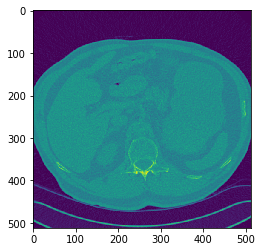

In [5]:
for patient in patients[:1]:
    label = patients_label.get_value(patient, "cancer")
    path = os.path.join(STAGE1_DATA, patient)
    
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    plt.imshow(slices[0].pixel_array)
    plt.show()

In [6]:
def load_scan(path):
    slices = [dicom.read_file(os.path.join(path, s)) for s in os.listdir(path)]
    slices.sort(key=lambda x: int(x.ImagePositionPatient[2]))
    
    try:
        slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    except:
        slice_thickness = np.abs(slices[0].SliceLocation - slices[1].SliceLocation)
        
    for s in slices:
        s.SliceThickness = slice_thickness
        
    return slices

In [7]:
def get_pixels_hu(slices):
    image = np.stack([s.pixel_array for s in slices])
    image = image.astype(np.int16)
    image[image == -2000] = 0
    
    for slice_number in range(len(slices)):
        intercept = slices[slice_number].RescaleIntercept
        slope = slices[slice_number].RescaleSlope
        
        if slope != 1:
            image[slice_number] = slope * image[slice_number].astype(np.float64)
            image[slice_number] = image[slice_number].astype(np.int16)
            
        image[slice_number] += np.int16(intercept)
        
    return np.array(image, dtype=np.int16)

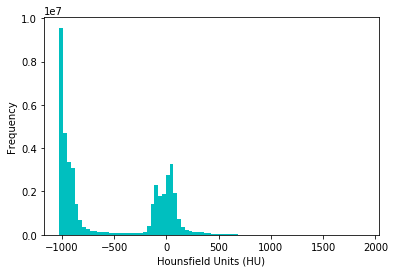

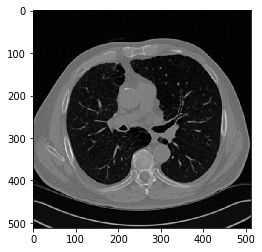

In [8]:
first_patient = load_scan(os.path.join(STAGE1_DATA, patients[0]))
first_patient_pixels = get_pixels_hu(first_patient)
plt.hist(first_patient_pixels.flatten(), bins=80, color="c")
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

plt.imshow(first_patient_pixels[80], cmap=plt.cm.gray)
plt.show()

In [9]:
def resample(image, scan, new_spacing=[1, 1, 1]):
    spacing = np.array([scan[0].SliceThickness] + scan[0].PixelSpacing, dtype=np.float32)
    
    resize_factor = spacing / new_spacing
    new_real_shape = image.shape * resize_factor
    new_shape = np.round(new_real_shape)
    real_resize_factor = new_shape / image.shape
    new_spacing = spacing / real_resize_factor
    
    image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode="nearest")
    
    return image, new_spacing

In [10]:
pix_resampled, spacing = resample(first_patient_pixels, first_patient, [1, 1, 1])

print("Shape before resample:", first_patient_pixels.shape)
print("Shape after resample:", pix_resampled.shape)

Shape before resample: (165, 512, 512)
Shape after resample: (330, 369, 369)


In [32]:
second_patient = load_scan(os.path.join(STAGE1_DATA, patients[1]))
second_patient_pixels = get_pixels_hu(second_patient)

pix_resampled, spacing = resample(second_patient_pixels, second_patient, [1, 1, 1])

print("Shape before resample:", second_patient_pixels.shape)
print("Shape after resample:", pix_resampled.shape)

Shape before resample: (180, 512, 512)
Shape after resample: (324, 310, 310)


In [15]:
def plot_3d(image, threshold=-300):
    p = image.transpose(2, 1, 0)
    
    verts, faces, normals, values = measure.marching_cubes_lewiner(p, threshold)
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")
    
    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)
    
    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])
    
    plt.show()

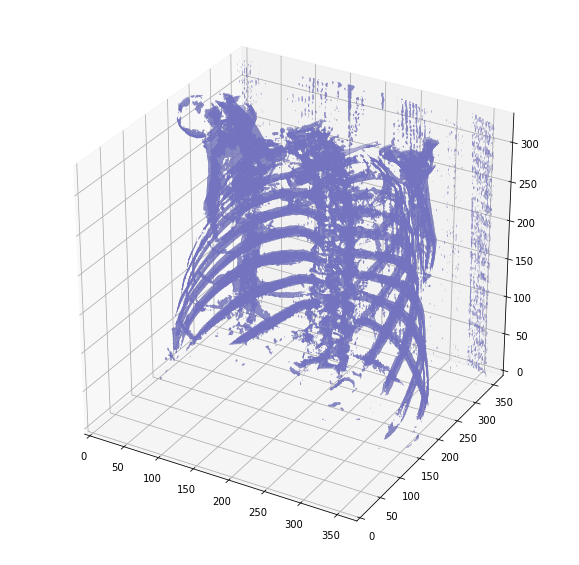

In [16]:
plot_3d(pix_resampled, 400)

In [17]:
def largest_label_volume(image, bg=-1):
    vals, counts = np.unique(image, return_counts=True)
    counts = counts[vals != bg]
    vals = vals[vals != bg]
    
    if len(counts) > 0:
        return vals[np.argmax(counts)]
    else:
        return None

In [22]:
def segment_lung_mask(image, fill_lung_structures=True, threshold=-320):
    binary_image = np.array(image > threshold, dtype=np.int8) + 1
    labels = measure.label(binary_image)
    
    background_label = labels[0, 0, 0]
    binary_image[background_label == labels] = 2
    
    if fill_lung_structures:
        for i, axial_slice in enumerate(binary_image):
            axial_slice = axial_slice - 1
            labeling = measure.label(axial_slice)
            l_max = largest_label_volume(labeling, bg=0)
            
            if l_max is not None:
                binary_image[i][labeling != l_max] = 1
                
    binary_image -= 1
    binary_image = 1 - binary_image
    
    labels = measure.label(binary_image, background=0)
    l_max = largest_label_volume(labels, bg=0)
    
    if l_max is not None:
        binary_image[labels != l_max] = 0
        
    return binary_image

In [23]:
segmented_lungs = segment_lung_mask(pix_resampled, False)
segmented_lungs_fill = segment_lung_mask(pix_resampled, True)

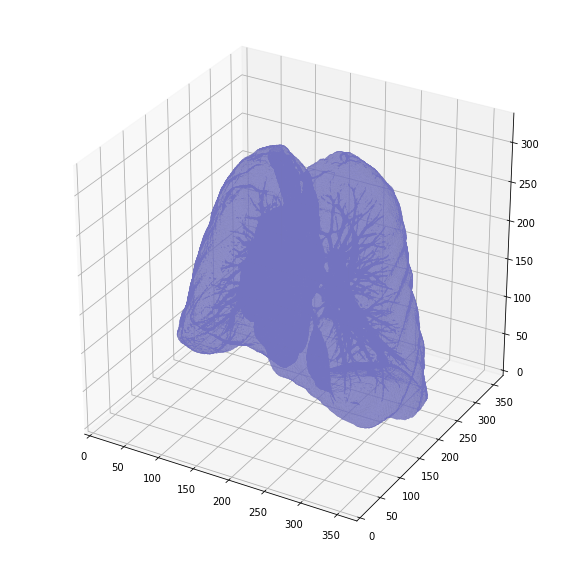

In [24]:
plot_3d(segmented_lungs, 0)

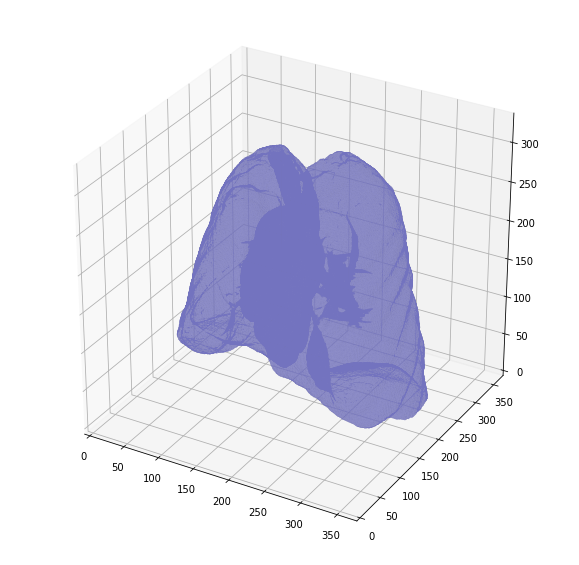

In [25]:
plot_3d(segmented_lungs_fill, 0)

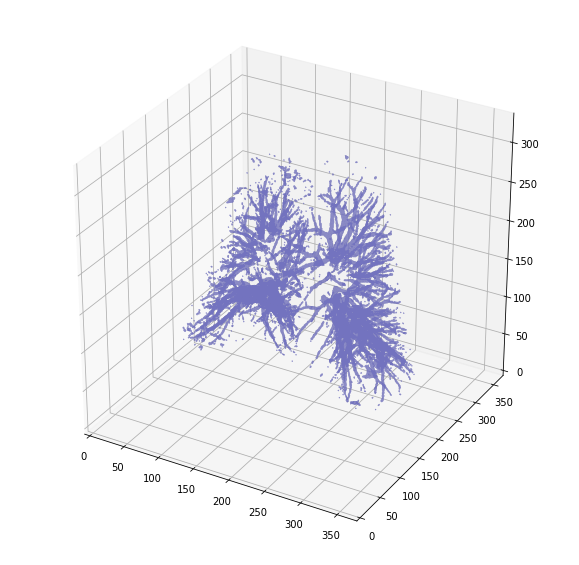

In [26]:
plot_3d(segmented_lungs_fill - segmented_lungs, 0)

In [27]:
MIN_BOUND = -1000.0
MAX_BOUND = 400.0

def normalize(image):
    image = (image - MIN_BOUND) / (MAX_BOUND - MIN_BOUND)
    image[image > 1] = 1.0
    image[image < 0] = 0.0
    
    return image

In [ ]:
PIXEL_MEAN = 0.25

def zero_center(image):
    image = image - PIXEL_MEAN

In [ ]:
def random_enhance_tf(image):
    new_image = image
    
#     seed = datetime.datetime.now().second
#     new_image = tf.image.random_flip_up_down(new_image, seed=seed)
    
    seed = datetime.datetime.now().second
    new_image = tf.image.random_flip_left_right(new_image, seed=seed)
    
#     seed = datetime.datetime.now().second
#     new_image = tf.image.random_brightness(new_image, 5, seed=seed)
    
#     seed = datetime.datetime.now().second
#     new_image = tf.image.random_contrast(new_image, 0.1, 1.5, seed=seed)
    
#     seed = datetime.datetime.now().second
#     new_image = tf.image.random_saturation(new_image, 0., 1.5, seed=seed)
    
    return new_image